# ST4234 Tutorial 2
Note:
- `scipy.stats.beta` refers to the Beta random variable
- `scipy.special.beta` refers to the Beta function

In [23]:
from scipy import stats, special
from scipy.optimize import minimize
from statistics import mean, stdev
from math import exp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Q1a: Let $y=15$,
\begin{align*}
    \text{Prior:}&&
    \theta
        &\sim \operatorname{Beta}(2,8)\\
    \text{Likelihood:}&&
    y|\theta
        &\sim \operatorname{Binomial}(43,\theta)\\
    \text{Posterior:}&&
    \theta|y
        &\sim \operatorname{Beta}(2+y,8+43-y)\\
        &&
        &=\operatorname{Beta}(17,36)
\end{align*}

In [2]:
def prior_1a(th):
    return stats.beta.pdf(th,2,8)

def likelihood_1a(th):
    return stats.binom.pmf(15, 43, th)
    
def posterior_1a(th):
    return stats.beta.pdf(th,17,36)

In [3]:
theta = np.linspace(0,1,10001)
out1a_prior = prior_1a(theta)
out1a_likelihood = likelihood_1a(theta)
out1a_posterior = posterior_1a(theta)

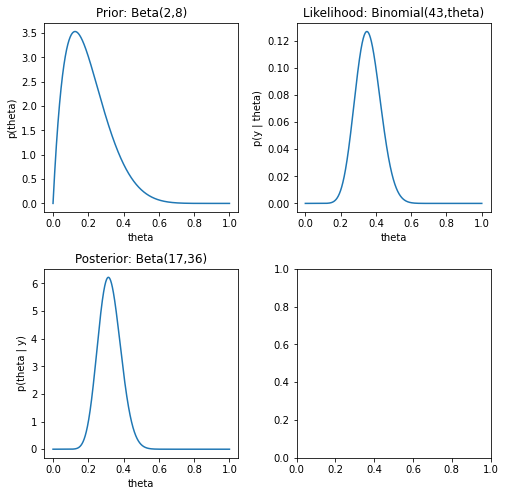

In [4]:
fig, ax = plt.subplots(2,2, figsize=(8,8))

ax[0][0].plot(theta, out1a_prior)
ax[0][0].set_xlabel("theta")
ax[0][0].set_ylabel("p(theta)")
ax[0][0].set_title("Prior: Beta(2,8)")

ax[0][1].plot(theta, out1a_likelihood)
ax[0][1].set_xlabel("theta")
ax[0][1].set_ylabel("p(y | theta)")
ax[0][1].set_title("Likelihood: Binomial(43,theta)")

ax[1][0].plot(theta, out1a_posterior)
ax[1][0].set_xlabel("theta")
ax[1][0].set_ylabel("p(theta | y)")
ax[1][0].set_title("Posterior: Beta(17,36)")

fig.subplots_adjust(hspace=.3, wspace=.3)

plt.show()

Q1b: Let $y=15$,
\begin{align*}
    \text{Prior:}&&
    \theta
        &\sim \operatorname{Beta}(8,2)\\
    \text{Likelihood:}&&
    y|\theta
        &\sim \operatorname{Binomial}(43,\theta)\\
    \text{Posterior:}&&
    \theta|y
        &\sim \operatorname{Beta}(8+y,2+43-y)\\
        &&
        &=\operatorname{Beta}(23,30)
\end{align*}

In [15]:
def prior_1b(th):
    return stats.beta.pdf(th,8,2)

def likelihood_1b(th):
    return stats.binom.pmf(15, 43, th)

def posterior_1b(th):
    return stats.beta.pdf(th,23,30)

In [16]:
theta = np.linspace(0,1,10001)
out1b_prior = prior_1b(theta)
out1b_likelihood = likelihood_1b(theta)
out1b_posterior = posterior_1b(theta)

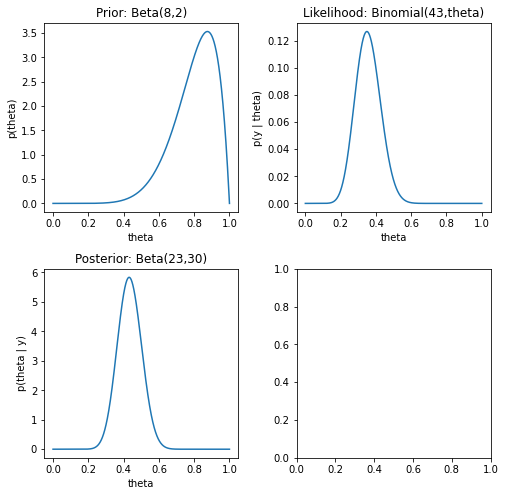

In [17]:
fig, ax = plt.subplots(2,2, figsize=(8,8))

ax[0][0].plot(theta, out1b_prior)
ax[0][0].set_xlabel("theta")
ax[0][0].set_ylabel("p(theta)")
ax[0][0].set_title("Prior: Beta(8,2)")

ax[0][1].plot(theta, out1b_likelihood)
ax[0][1].set_xlabel("theta")
ax[0][1].set_ylabel("p(y | theta)")
ax[0][1].set_title("Likelihood: Binomial(43,theta)")

ax[1][0].plot(theta, out1b_posterior)
ax[1][0].set_xlabel("theta")
ax[1][0].set_ylabel("p(theta | y)")
ax[1][0].set_title("Posterior: Beta(23,30)")

fig.subplots_adjust(hspace=.3, wspace=.3)

plt.show()

Q1c:
    
The prior refers to
\begin{align*}
    p(\theta)
        &=\frac{1}{4} \frac{\Gamma(10)}{\Gamma(2) \Gamma(8)}\left[3 \theta(1-\theta)^{7}+\theta^{7}(1-\theta)\right]\\
        &=18\left[3 \theta(1-\theta)^{7}+\theta^{7}(1-\theta)\right]
\end{align*}

Note: $\Gamma(n)=(n-1)!\quad \forall n\in\mathbb{Z}_{>0}$

In [8]:
def prior_1c(th):
    return 18 * (3*th*pow(1-th,7) + pow(th,7)*(1-th))

In [9]:
theta = np.linspace(0,1,10001)
out1c = prior_1c(theta)

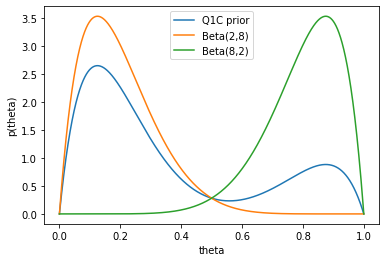

In [10]:
plt.plot(theta, out1c)
plt.plot(theta, out1a_prior)
plt.plot(theta, out1b_prior)
plt.xlabel("theta")
plt.ylabel("p(theta)")
plt.legend(["Q1C prior", "Beta(2,8)", "Beta(8,2)"])
plt.show()

Q1d:

In [11]:
def posterior_1d(th):
    return prior_1c(th) * likelihood_1a(th)

In [12]:
theta = np.linspace(0,1,10001)
out1d = posterior_1d(theta)

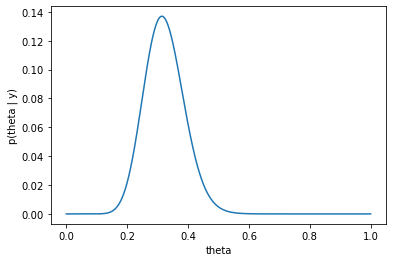

In [14]:
plt.plot(theta, out1d)
plt.xlabel("theta")
plt.ylabel("p(theta | y)")
plt.show()

To find the maxima of a function $f$, we can equivalently find the minima of $-f$.

In [21]:
minimize(lambda x: -posterior_1d(x), 0.3)

      fun: -0.13691408156984033
 hess_inv: array([[0.03111137]])
      jac: array([-1.39698386e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([0.31408589])

Q2b: Galenshore distributions

Galenshore$(a,\theta)$: $\displaystyle p(y | \theta)=\frac{2}{\Gamma(a)} y^{2 a-1} \theta^{2 a} \exp \left(-\theta^{2} y^{2}\right)$

Galenshore prior: $\displaystyle p(\theta) \propto \theta^{2 \nu_{0}-1} \exp \left(-\theta^{2} \tau_{0}^{2}\right)$,
i.e. $\theta\sim \operatorname{Galenshore}(\nu_0,\tau_0)$

In [26]:
def galenshore_pdf(y, a, th):
    return 2/special.gamma(a) * pow(th, 2*a) * pow(y, 2*a-1)\
        * exp(-th*th*y*y)

In [42]:
y = np.linspace(0.1,5, 1000)
galenshore_1_1_pdf = [galenshore_pdf(i,1,1) for i in y]
galenshore_dot1_dot1_pdf = [galenshore_pdf(i,0.1,0.1) for i in y] 
galenshore_3_3_pdf = [galenshore_pdf(i,3,3) for i in y] 
galenshore_5_1_pdf = [galenshore_pdf(i,5,1) for i in y] 
galenshore_1_5_pdf = [galenshore_pdf(i,1,5) for i in y]

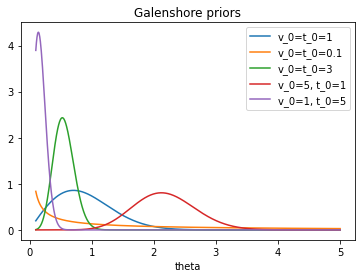

In [44]:
plt.plot(y, galenshore_1_1_pdf)
plt.plot(y, galenshore_dot1_dot1_pdf)
plt.plot(y, galenshore_3_3_pdf)
plt.plot(y, galenshore_5_1_pdf)
plt.plot(y, galenshore_1_5_pdf)
plt.xlabel("theta")
plt.title("Galenshore priors")
plt.legend(["v_0=t_0=1", "v_0=t_0=0.1", "v_0=t_0=3", "v_0=5, t_0=1", "v_0=1, t_0=5"])
plt.show()